# Predicting Benign and Malignant Breast Cancers 

## Table of Content:
* [Project Summary](#zero-bullet)
* [Notebook Imports](#first-bullet)
* [Importing Data](#second-bullet)
* [Data Exploring](#third-bullet)
    * [Data Cleaning](#third-one-bullet)
    * [Violin Plot](#third-two-bullet)
    * [Swarm Plot](#third-three-bullet)
    * [Data Preprocessing](##third-four-bullet)
* [Logistic Regression](#fourth-bullet)
* [K-Nearest Neighbor](#fifth-bullet)
* [Decision Tree Classifier](#sixth-bullet)
* [Artificial Neural Net](#seventh-bullet)

## Project Summary <a class="anchor" id="zero-bullet"></a>

The problem of cancer diagnosis and identification has plagued modern biology and healthcare for as long as the disciplines have existed. This project in particular focuses on the classification of breast cancer cells as benign or malignant, utilizing features derived from a digitized image of a breast mass. These derived features serve as our model inputs, whereby our models predict whether a given mass is benign or malignant. Since this classification problem is longstanding, many different approaches have been used to tackle this problem, such as logistic regression or neural networks.

This project will create prediction models using Logistic Regression, K-Nearest Neighbors, Decision Tree and Artificial Neural Network techniques in order to find the most accurate model for classifying breast cancer cells as benign (B) or malignant (M), with evaluation using standard classification accuracy.


## Notebook Imports <a class="anchor" id="first-bullet"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#MACHINE LEARNING LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#TENSOR
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD

#WARNING LIBRARIES
import warnings
warnings.filterwarnings('ignore')

2022-12-08 14:56:48.017282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Importing Data <a class="anchor" id="second-bullet"></a>

In [2]:
data = pd.read_csv("data.csv")

## Data Exploring <a class="anchor" id="third-bullet"></a>

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Data Content:

* ID number
* Diagnosis (M = malignant, B = benign)
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)
* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.\
Missing attribute values: none\
Class distribution: 357 benign, 212 malignant

### Data Cleaning <a class="anchor" id="third-one-bullet"></a>

In [6]:
data.duplicated().sum()

0

No Duplicated Data

In [7]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
data.drop('Unnamed: 32', axis = 1, inplace = True)

In [9]:
data.drop('id', axis = 1, inplace = True)

The dataset contains no Null Values

### Violin Plot <a class="anchor" id="third-two-bullet"></a>

In [10]:
def violinplotVisualisation(start_index,end_index):
    df =data.drop('diagnosis',axis=1) #STANDARDISE THE DATA DIFF B/W AVG
    df_std = (df - df.mean())/df.std() #SUBTRACT MEAN AND DIVIDE STD
    df = pd.concat([data.diagnosis, df_std.iloc[:, start_index:end_index]],axis=1) #MAKE SUBGROUP OF 10 FEATURES AXIS=1 (COLS)
    df= pd.melt(df, id_vars = 'diagnosis',
             var_name='features',
             value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x='features',y='value',hue='diagnosis',data=df,split=True,inner='quart')
    plt.xticks(rotation=45)

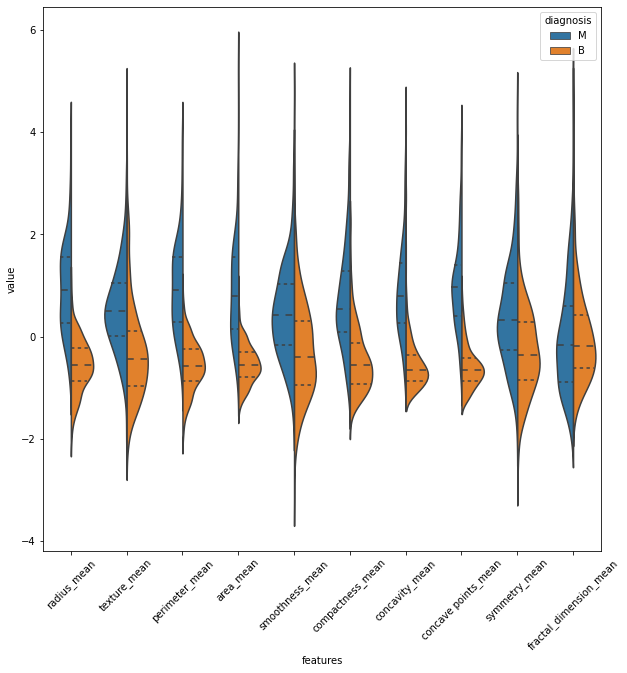

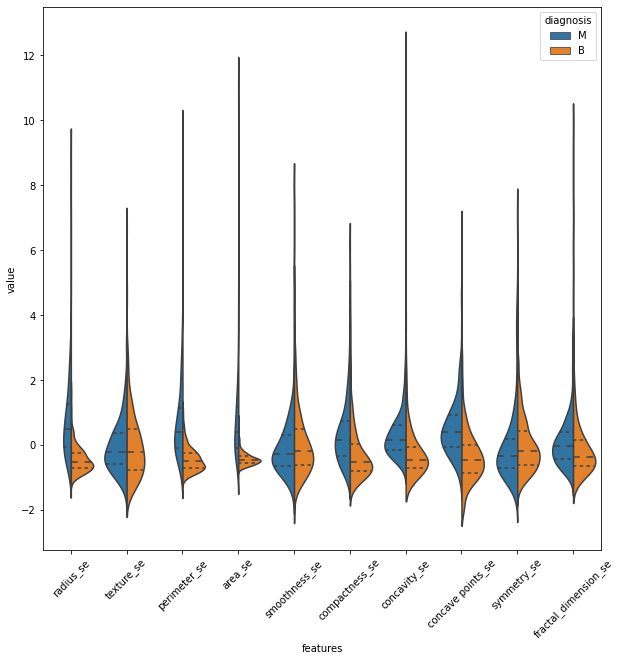

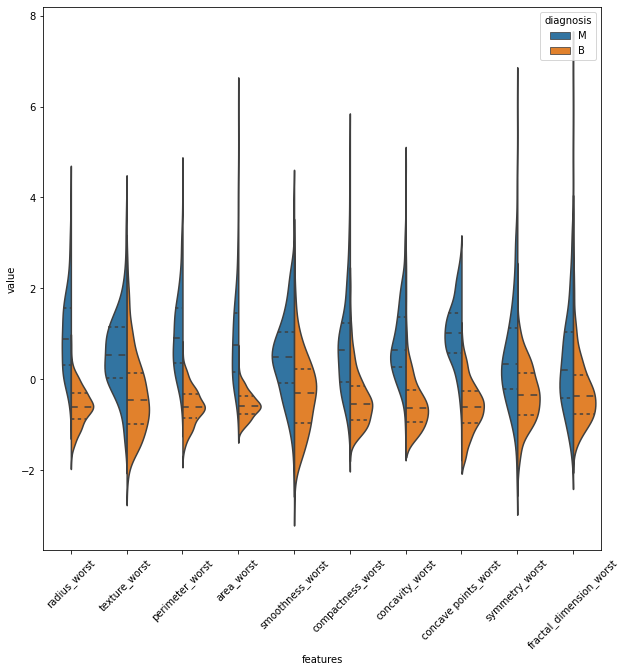

In [11]:
violinplotVisualisation(0,10)
violinplotVisualisation(10,20)
violinplotVisualisation(20,30)

### Swarm Plot <a class="anchor" id="third-three-bullet"></a>

In [12]:
def swarmplotVisualisation(start_index, end_index):
    sns.set(style='whitegrid', palette='muted')
    df =data.drop('diagnosis',axis=1) #STANDARDISE THE DATA DIFF B/W AVG
    df_std = (df - df.mean())/df.std() #STANDARDISE THE DATA DIFF B/W AVG
    df = pd.concat([data.diagnosis, df_std.iloc[:, start_index:end_index]],axis=1) #MAKE SUBGROUP OF 10 FEATURES AXIS=1 (COLS)
    df= pd.melt(df, id_vars = 'diagnosis',
             var_name='features',
             value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='features',y='value',hue='diagnosis',data=df)
    plt.xticks(rotation=45)


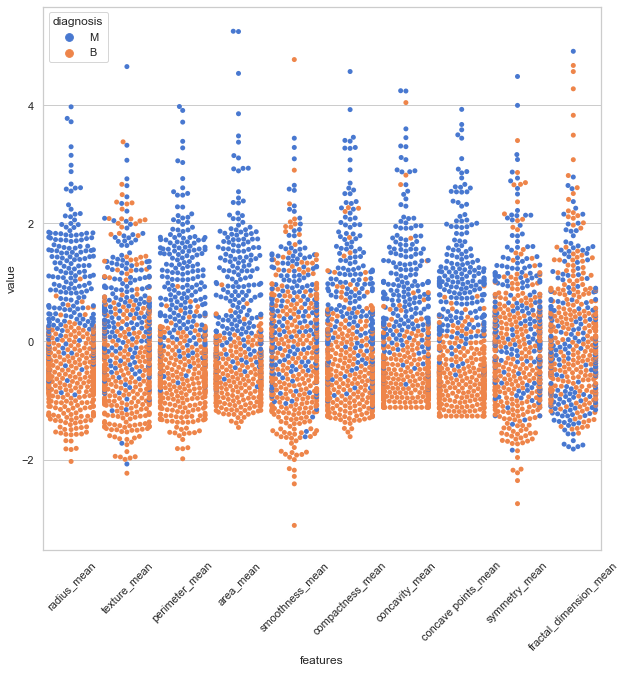

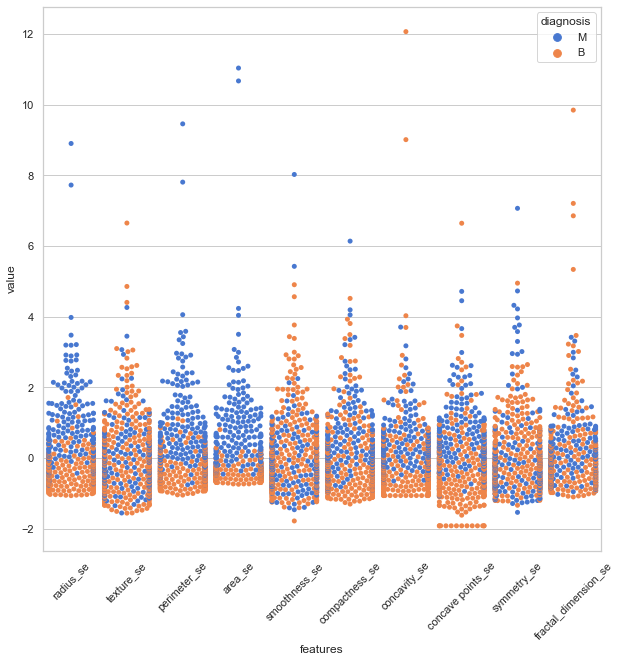

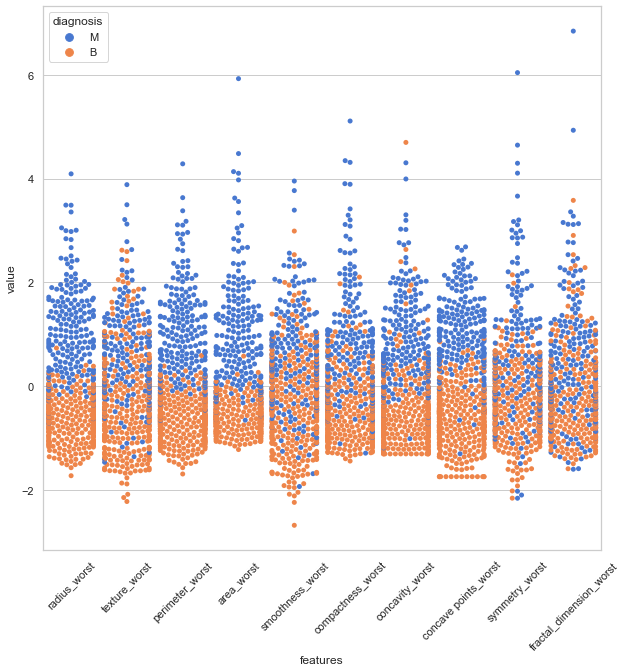

In [13]:
swarmplotVisualisation(0,10)
swarmplotVisualisation(10,20)
swarmplotVisualisation(20,30)

### Data Preprocessing <a class="anchor" id="third-four-bullet"></a>

Text(0.5, 1.05, 'Correlation of df Features')

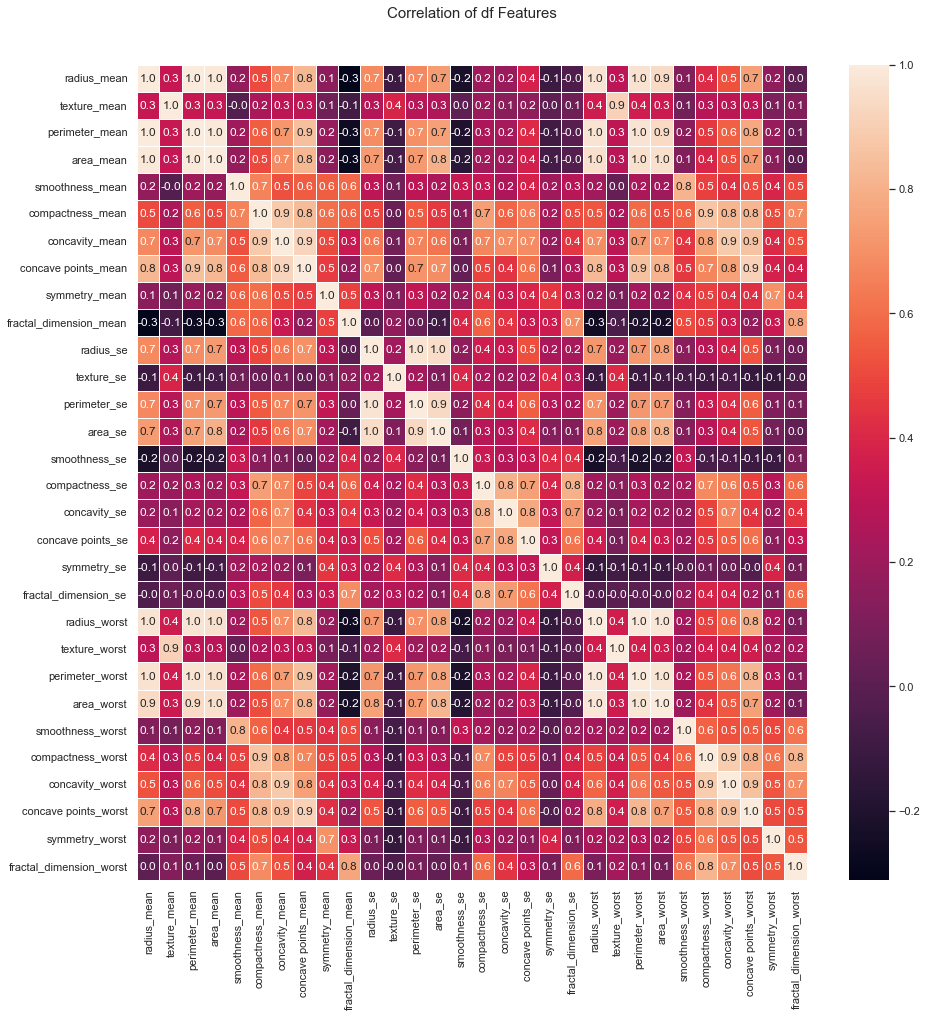

In [14]:
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.title('Correlation of df Features', y=1.05, size=15)

As we can see many features are correlated to each other so we will remove highly correlated features bigger than 0.95

In [15]:
data.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
, axis = 1, inplace = True)

In [16]:
data.shape

(569, 24)

Our diagnostic values need to be converted to numerical values in order to be able to process.

In [17]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we need to normalize all values in their own way.

In [18]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,...,0.300625,0.311645,0.183042,0.141525,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,...,0.253836,0.084539,0.091110,0.303571,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,...,0.389847,0.205690,0.127006,0.360075,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,...,0.353665,0.728148,0.287205,0.385928,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,...,0.357075,0.136179,0.145800,0.123934,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Splitting the dataset into training and testing sets.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

## Logistic Regression <a class="anchor" id="fourth-bullet"></a>

In [20]:
lr = LogisticRegression(random_state = 1) #WE ARE BUILDING OUR MODEL
lr.fit(x_train,y_train)                   #WE ARE TRAINING OUR MODEL
print("Print accuracy of Logistic Regression Classifier: {}".format(lr.score(x_test,y_test)))
lr_acc_score = lr.score(x_test,y_test)

Print accuracy of Logistic Regression Classifier: 0.9649122807017544


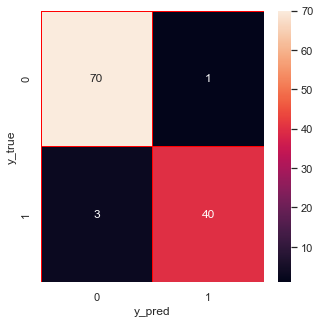

In [21]:
y_pred = lr.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#VISUALIZE
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## K-Nearest Neighbors Classifier <a class="anchor" id="fifth-bullet"></a>

In [22]:
knn = KNeighborsClassifier(n_neighbors=10) #WE ARE BUILDING OUR MODEL
knn.fit(x_train,y_train)                   #WE ARE TRAINING OUR MODEL
print("Print accuracy of K Neighbors Classifier algo: {}".format(knn.score(x_test,y_test)))
knn_acc_score = knn.score(x_test,y_test)

Print accuracy of K Neighbors Classifier algo: 0.956140350877193


We can create a for loop to find the best k value.

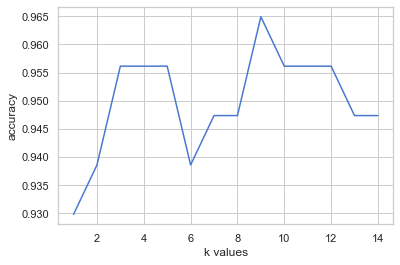

In [23]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
#VISUALIZE
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.savefig('plot')
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=9) #WE ARE BUILDING OUR MODEL
knn.fit(x_train,y_train)                  #WE ARE TRAINING OUR MODEL
print("Test accuracy {}".format(knn.score(x_test,y_test)))

Test accuracy 0.9649122807017544


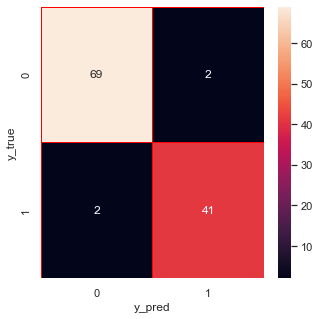

In [25]:
y_pred = knn.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#VISUALIZE
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Decision Tree Classifier <a class="anchor" id="sixth-bullet"></a>

In [26]:
dt = DecisionTreeClassifier(random_state = 1)  #WE ARE BUILDING OUR MODEL
dt.fit(x_train,y_train)                        #WE ARE TRAINING OUR MODEL
print("Print accuracy of Decision Tree Classifier algo: ",dt.score(x_test,y_test))
dt_acc_score = dt.score(x_test,y_test)

Print accuracy of Decision Tree Classifier algo:  0.9298245614035088


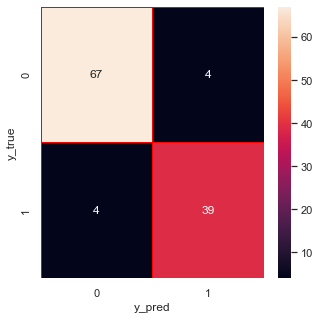

In [27]:
y_pred = dt.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#VISUALIZE
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Artificial Neutral Net <a class="anchor" id="seventh-bullet"></a>

In [28]:
y = data.diagnosis.values
X = data.drop(["diagnosis"],axis=1)

In [29]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [31]:
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [32]:
model = Sequential()

2022-12-08 14:57:21.589781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
model.add(Dense(units = 30,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
model.add(Dense(units = 30,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
model.add(Dense(units = 1,activation = 'sigmoid'))

In [34]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#SETTING CALLBACKS FOR MONITORING MAXIMUM ACCURACY
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
ann=model.fit(X_train_scale, y_train,batch_size = 32, validation_data=(X_test_scaled, y_test),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 2s 21ms/step - loss: 1.2293 - accuracy: 0.4659 - val_loss: 0.8151 - val_accuracy: 0.5088
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8785 - accuracy: 0.5912 - val_loss: 0.6121 - val_accuracy: 0.7193
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7918 - accuracy: 0.6462 - val_loss: 0.4978 - val_accuracy: 0.7895
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6396 - accuracy: 0.6945 - val_loss: 0.4279 - val_accuracy: 0.8246
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7582 - val_loss: 0.3850 - val_accuracy: 0.8333
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5006 - accuracy: 0.7692 - val_loss: 0.3527 - val_accuracy: 0.8684
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4856 - accuracy: 0.7780 - val_loss: 0.3241 - val_accuracy: 0.8684
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1577 - accuracy: 0.9560 - val_loss: 0.1092 - val_accuracy: 0.9737
Epoch 60/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1180 - accuracy: 0.9582 - val_loss: 0.1094 - val_accuracy: 0.9737
Epoch 61/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.9429 - val_loss: 0.1101 - val_accuracy: 0.9737
Epoch 62/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9626 - val_loss: 0.1103 - val_accuracy: 0.9737
Epoch 63/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.9495 - val_loss: 0.1123 - val_accuracy: 0.9737
Epoch 64/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1207 - accuracy: 0.9538 - val_loss: 0.1142 - val_accuracy: 0.9737
Epoch 65/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1264 - accuracy: 0.9560 - val_loss: 0.1138 - val_accuracy: 0.9737
Epoch 

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                720       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 30)                0

<AxesSubplot:>

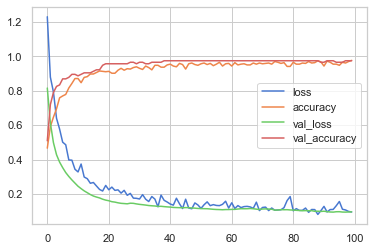

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [37]:
#TESTING FOR TEST DATA
y_pred = model.predict(X_test_scaled)
#CONVERTING VALUES
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 2ms/step


In [38]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)

[[70  2]
 [ 1 41]]
score is: 0.9736842105263158


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



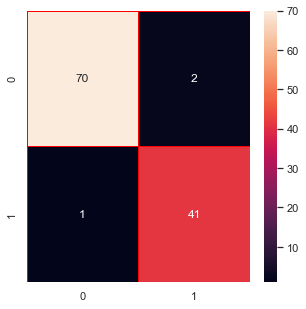

In [40]:
#CREATING HEATMAP OF CONFUSSION MATRIX
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.show()